In [3]:
import pandas
import numpy
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon


# Introduction

Our goal was to determine the best neighborhood for a broke recent college grad to live in, as we will likely be one of them soon enough. This project was really just us planning for our futures, and possibly yours too. You're welcome. 

Our process for choosing the metric started with Mark wanting to get away with parking illegally. We could have looked at the best neighborhood for avoiding tickets, getting away with crime, or alternatively the worst neighborhoods for those things. Instead, we looked a little more broad and realized that free parking saves money, which can also be done by other things, and when we all graduate with plenty of student loans and are looking for our first jobs, we will need that.


# The Metric

In determining the best neighborhood for a broke college grad, we looked at free parking (as mentioned above), cheap housing for rent, and crime rates/safety. 

### Cheap housing for rent

For this metric, I used the Contract Rent dataset from the 2015 Pittsburgh American Community Survey. This dataset inlcudes the number of houses/properties rented in each neighborhood under different price ranges. As most recent graduates are not in a position to buy a house, most will be looking to rent. Paying for housing often takes up the largest portion of ones income, so minimizing the cost of this will be very important to saving money. While this dataset is slightly old, and doesn't account for other costs such as utilities, it can give a good baseline for where each neighborhood sits relative to others in terms of cost of housing. 

I capped "cheap housing" at \\$1000 a month and under. The average Pitt graduate who has a job after graduation (in 2018) had a salary of approximately \\$48,000 a year and could afford \\$1000 a month if they spent 30% of their income on rent, as recommended. Of course, \\$1000 a month is the *limit* of what I am considering cheap, and not necessarily the goal. 

In [4]:
#contract rent dataset
contract_rent_pandas = pandas.read_csv("contract-rent.csv", 
                                       index_col="Neighborhood")
contract_rent_pandas.head()

,Id,Estimate; Total:,Margin of Error; Total:,Estimate; With cash rent:,Margin of Error; With cash rent:,Estimate; With cash rent: - Less than $100,Margin of Error; With cash rent: - Less than $100,Estimate; With cash rent: - $100 to $149,Margin of Error; With cash rent: - $100 to $149,Estimate; With cash rent: - $150 to $199,...,"Estimate; With cash rent: - $2,000 to $2,499","Margin of Error; With cash rent: - $2,000 to $2,499","Estimate; With cash rent: - $2,500 to $2,999","Margin of Error; With cash rent: - $2,500 to $2,999","Estimate; With cash rent: - $3,000 to $3,499","Margin of Error; With cash rent: - $3,000 to $3,499","Estimate; With cash rent: - $3,500 or more","Margin of Error; With cash rent: - $3,500 or more",Estimate; No cash rent,Margin of Error; No cash rent
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,798.0,91.000000,781.0,89.000000,23.0,27.000000,6.0,8.000000,77.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,17.0,12.000000
Allegheny West,2,77.0,31.000000,77.0,31.000000,0.0,10.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
Allentown,3,531.0,138.166566,481.0,120.540450,0.0,17.320508,0.0,17.320508,18.0,...,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508,50.0,78.287930
Arlington,4,209.0,70.562029,204.0,69.899928,0.0,17.320508,0.0,17.320508,0.0,...,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508,5.0,15.779734
Arlington Heights,5,144.0,59.000000,140.0,59.000000,0.0,10.000000,6.0,8.000000,23.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,4.0,6.000000


### Free Parking


In [ ]:
#parking dataset


### Crime Rates

In [ ]:
# crime rates dataset


# The Best Neighborhood


### The best neighborhood based on rent price: 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9698706c70>,
      dtype=object)

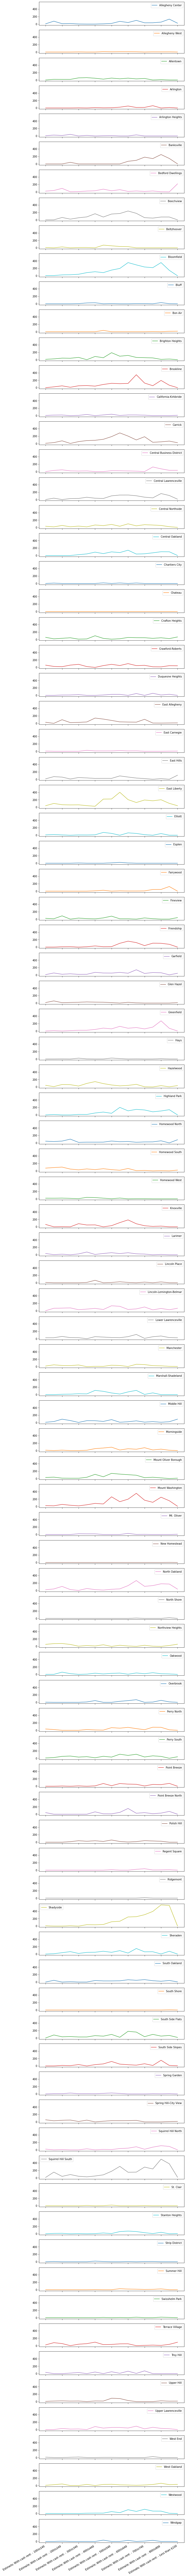

In [5]:
column_list = list(contract_rent_pandas)
columns_to_remove = ["Neighborhood" , "Id" , "Estimate; Total:" , "Margin of Error; Total:" , "Estimate; With cash rent:" , "Margin of Error; With cash rent:" , 
                    "Margin of Error; With cash rent: - Less than $100" , "Margin of Error; With cash rent: - $100 to $149" , "Margin of Error; With cash rent: - $150 to $199" , 
                    "Margin of Error; With cash rent: - $200 to $249" , "Margin of Error; With cash rent: - $250 to $299" , "Margin of Error; With cash rent: - $300 to $349" , 
                    "Margin of Error; With cash rent: - $350 to $399" , "Margin of Error; With cash rent: - $400 to $449" , "Margin of Error; With cash rent: - $450 to $499" , 
                    "Margin of Error; With cash rent: - $500 to $549" , "Margin of Error; With cash rent: - $550 to $599" , "Margin of Error; With cash rent: - $600 to $649" , 
                    "Margin of Error; With cash rent: - $650 to $699" , "Margin of Error; With cash rent: - $700 to $749" , "Margin of Error; With cash rent: - $750 to $799" , 
                    "Margin of Error; With cash rent: - $800 to $899" , "Margin of Error; With cash rent: - $900 to $999" , "Margin of Error; With cash rent: - $1,000 to $1,249" , 
                    "Margin of Error; With cash rent: - $1,250 to $1,499" , "Margin of Error; With cash rent: - $1,500 to $1,999" , "Margin of Error; With cash rent: - $2,000 to $2,499" , 
                    "Margin of Error; With cash rent: - $2,500 to $2,999" , "Margin of Error; With cash rent: - $3,000 to $3,499" , "Margin of Error; With cash rent: - $3,500 or more" , 
                    "Estimate; With cash rent: - $1,000 to $1,249" , "Estimate; With cash rent: - $1,250 to $1,499" , "Estimate; With cash rent: - $1,500 to $1,999" , 
                    "Estimate; With cash rent: - $2,000 to $2,499" , "Estimate; With cash rent: - $2,500 to $2,999" , "Estimate; With cash rent: - $3,000 to $3,499" , 
                    "Estimate; With cash rent: - $3,500 or more" , "Estimate; No cash rent" , "Margin of Error; No cash rent" , "homes under $1000"]

homes_under_1000 = sorted( list(set(column_list) - set(columns_to_remove)))

contract_rent_woMOE = contract_rent_pandas[homes_under_1000]

contract_rent_woMOE.loc["Allegheny Center":"Windgap"].T.plot.line(subplots = True , sharey = True , figsize = (10, 200))

# Conclusion
